<a href="https://colab.research.google.com/github/TanyaPat01/Generate-Challan/blob/Model-CNN/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import os
import glob
import cv2
import matplotlib.pyplot as plt
import shutil

In [ ]:
# Preprocessing

In [3]:
dataset_path = '/content/drive/MyDrive/helmet_detection/images'
for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    if filename.lower().endswith(('.png')):
        img = cv2.imread(img_path)
img.shape

(245, 400, 3)

In [ ]:
# dataset_path = '/content/drive/MyDrive/helmet_detection/images'
# target_size = (224, 224)
# images = []
# for filename in os.listdir(dataset_path):
#     img_path = os.path.join(dataset_path, filename)
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = cv2.resize(img, target_size)  #image resizing
#     img = img.astype('float32') / 255.0  # Normalize pixel values
#     images.append(img)
# img.shape


(224, 224, 3)

In [ ]:
# len(images)

761

In [4]:
xml_ = glob.glob('/content/drive/MyDrive/helmet_detection/annotations/*.xml')

In [ ]:
# import xml.etree.ElementTree as ET
# lst=[]
# for data in xml_:
#     with open(data) as f:
#         d = f.read()
#         xml_string = d


#     root = ET.fromstring(xml_string)  # parse the XML string

#     # iterate over all elements in the root
#     for child in root:
#         # access the object you're interested in by its tag
#         if  child.tag == 'object' and (child.find('name').text == 'With Helmet'or child.find('name').text == 'Without Helmet'):
#             # do something with the object...:
#             lst.append(child.find('name').text)
#             break

In [ ]:
# images=os.listdir('/content/drive/MyDrive/helmet_detection/images')
# images=pd.DataFrame(images)
# image=list(np.array(images).flatten())
# image[:]

In [ ]:
# len(image)

In [ ]:
# data = pd.DataFrame({'filename': image[:761], 'classes': lst})
# data

In [ ]:
# data = pd.DataFrame({'filename': image[:761], 'classes': lst})
# without_helmet_images = data[data['classes'] == 'Without Helmet'][['filename']]

# print("Dataframe of images belonging to 'Without Helmet' class:")
# print(without_helmet_images)

In [ ]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# data.groupby('classes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# def display_sample_images(folder_path, num_samples=5):
#     images = os.listdir(folder_path)[:num_samples]
#     plt.figure(figsize=(15, 5))
#     for i, image_name in enumerate(images):
#         image_path = os.path.join(folder_path, image_name)
#         image = cv2.imread(image_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         plt.subplot(1, num_samples, i + 1)
#         plt.imshow(image)
#         plt.axis('off')
#         plt.title(f"Sample {i + 1}")
#     plt.show()

# # Set paths to the 'With Helmet' and 'Without Helmet' folders
# with_helmet_folder = '/content/drive/MyDrive/helmet_detection/with helmet'
# without_helmet_folder = '/content/drive/MyDrive/helmet_detection/without helmet'

# # Display sample images from 'With Helmet' folder
# print("Sample images from 'With Helmet' folder:")
# display_sample_images(with_helmet_folder)

# # Display sample images from 'Without Helmet' folder
# print("Sample images from 'Without Helmet' folder:")
# display_sample_images(without_helmet_folder)

# # Calculate and plot class distributions
# def plot_class_distribution(folder_paths):
#     class_counts = []
#     for folder_path in folder_paths:
#         class_counts.append(len(os.listdir(folder_path)))
#     classes = ['With Helmet', 'Without Helmet']

#     plt.bar(classes, class_counts, color=['blue', 'orange'])
#     plt.xlabel('Classes')
#     plt.ylabel('Number of Images')
#     plt.title('Class Distribution')
#     plt.show()

# # Plot class distributions
# plot_class_distribution([with_helmet_folder, without_helmet_folder])



In [5]:
import xml.etree.ElementTree as ET

with_helmet_folder = '/content/drive/MyDrive/helmet_detection/annotations/with_helmet'
without_helmet_folder = '/content/drive/MyDrive/helmet_detection/annotations/without_helmet'

for data in xml_:
    with open(data) as f:
        d = f.read()
        xml_string = d

    root = ET.fromstring(xml_string)  # parse the XML string

    # iterate over all elements in the root
    for child in root:
        # access the object you're interested in by its tag
        if child.tag == 'object' and (child.find('name').text == 'With Helmet' or child.find('name').text == 'Without Helmet'):
            filename = os.path.basename(data)
            if child.find('name').text == 'With Helmet':
                # Move the file to 'With Helmet' folder
                shutil.move(data, os.path.join(with_helmet_folder, filename))
            else:
                # Move the file to 'Without Helmet' folder
                shutil.move(data, os.path.join(without_helmet_folder, filename))
            break


In [6]:
with_helmet_folder = '/content/drive/MyDrive/helmet_detection/annotations/with_helmet'
without_helmet_folder = '/content/drive/MyDrive/helmet_detection/annotations/without_helmet'

# Count files in 'With Helmet' folder
with_helmet_count = len(os.listdir(with_helmet_folder))

# Count files in 'Without Helmet' folder
without_helmet_count = len(os.listdir(without_helmet_folder))

print(f'Number of files in "With Helmet" folder: {with_helmet_count}')
print(f'Number of files in "Without Helmet" folder: {without_helmet_count}')


Number of files in "With Helmet" folder: 533
Number of files in "Without Helmet" folder: 228


In [ ]:
annotation_folder = '/content/drive/MyDrive/helmet_detection/annotations/with_helmet'
image_folder = '/content/drive/MyDrive/helmet_detection/images'
new_folder = '/content/drive/MyDrive/helmet_detection/with helmet'

# Get filenames from annotation folder
annotation_files = os.listdir(annotation_folder)

# Extract filenames without extension from annotation files
annotation_filenames = [os.path.splitext(file)[0] for file in annotation_files]

# Match filenames in the image dataset folder and copy matched images to a new folder
for filename in annotation_filenames:
    image_path = os.path.join(image_folder, filename + '.png')  # Assuming images have .jpg extension
    if os.path.exists(image_path):
        # Copy the matched image to the new folder
        shutil.copy(image_path, os.path.join(new_folder, filename + '.png'))


In [7]:
new_folder = '/content/drive/MyDrive/helmet_detection/with helmet'
num_files_in_new_folder = len(os.listdir(new_folder))

print(f'Number of files in the "new_folder": {num_files_in_new_folder}')

Number of files in the "new_folder": 533


In [ ]:
annotation_folder = '/content/drive/MyDrive/helmet_detection/annotations/without_helmet'
image_folder = '/content/drive/MyDrive/helmet_detection/images'
new_folder_ht = '/content/drive/MyDrive/helmet_detection/without helmet'

# Get filenames from annotation folder
annotation_files = os.listdir(annotation_folder)

# Extract filenames without extension from annotation files
annotation_filenames = [os.path.splitext(file)[0] for file in annotation_files]

# Match filenames in the image dataset folder and copy matched images to a new folder
for filename in annotation_filenames:
    image_path = os.path.join(image_folder, filename + '.png')  # Assuming images have .jpg extension
    if os.path.exists(image_path):
        # Copy the matched image to the new folder
        shutil.copy(image_path, os.path.join(new_folder_ht, filename + '.png'))




Number of files in the "new_folder_ht": 228


In [8]:
new_folder_ht = '/content/drive/MyDrive/helmet_detection/without helmet'
num_files_in_new_folder = len(os.listdir(new_folder_ht))

print(f'Number of files in the "new_folder_ht": {num_files_in_new_folder}')

Number of files in the "new_folder_ht": 228


In [9]:
new_folder = '/content/drive/MyDrive/helmet_detection/with helmet'
file_names = os.listdir(new_folder)
file_data = []
for filename in file_names:
    if filename.endswith('.png'):
        class_name = 'With Helmet'
        file_data.append({'filename': filename, 'class': class_name})
df_with = pd.DataFrame(file_data)
print(df_with)


                filename        class
0      BikesHelmets0.png  With Helmet
1    BikesHelmets104.png  With Helmet
2    BikesHelmets102.png  With Helmet
3    BikesHelmets100.png  With Helmet
4    BikesHelmets105.png  With Helmet
..                   ...          ...
528   BikesHelmets91.png  With Helmet
529   BikesHelmets82.png  With Helmet
530   BikesHelmets96.png  With Helmet
531   BikesHelmets97.png  With Helmet
532   BikesHelmets99.png  With Helmet

[533 rows x 2 columns]


In [10]:
new_folder = '/content/drive/MyDrive/helmet_detection/without helmet'
file_names = os.listdir(new_folder)
file_data = []
for filename in file_names:
    if filename.endswith('.png'):
        class_name = 'Without Helmet'
        file_data.append({'filename': filename, 'class': class_name})
df_without = pd.DataFrame(file_data)
print(df_without)


                filename           class
0    BikesHelmets103.png  Without Helmet
1     BikesHelmets10.png  Without Helmet
2    BikesHelmets110.png  Without Helmet
3    BikesHelmets111.png  Without Helmet
4    BikesHelmets112.png  Without Helmet
..                   ...             ...
223    BikesHelmets9.png  Without Helmet
224   BikesHelmets93.png  Without Helmet
225   BikesHelmets80.png  Without Helmet
226   BikesHelmets87.png  Without Helmet
227   BikesHelmets98.png  Without Helmet

[228 rows x 2 columns]


In [11]:
merged_df = pd.concat([df_with, df_without], ignore_index=True)
print(merged_df)

                filename           class
0      BikesHelmets0.png     With Helmet
1    BikesHelmets104.png     With Helmet
2    BikesHelmets102.png     With Helmet
3    BikesHelmets100.png     With Helmet
4    BikesHelmets105.png     With Helmet
..                   ...             ...
756    BikesHelmets9.png  Without Helmet
757   BikesHelmets93.png  Without Helmet
758   BikesHelmets80.png  Without Helmet
759   BikesHelmets87.png  Without Helmet
760   BikesHelmets98.png  Without Helmet

[761 rows x 2 columns]


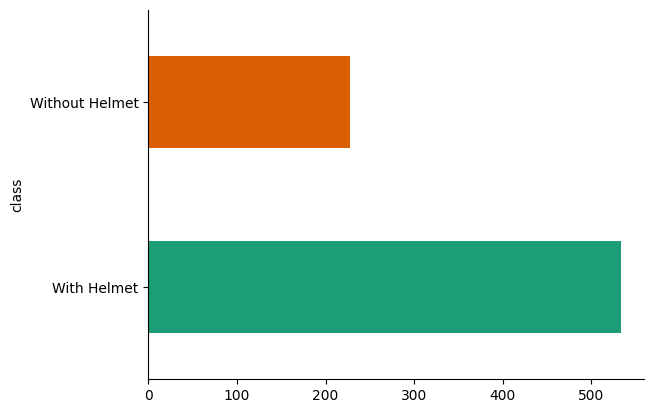

In [12]:

import seaborn as sns
merged_df.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Sample images from 'With Helmet' folder:


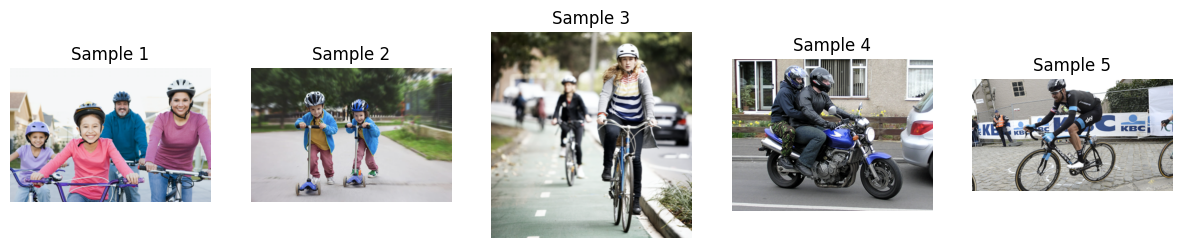

Sample images from 'Without Helmet' folder:


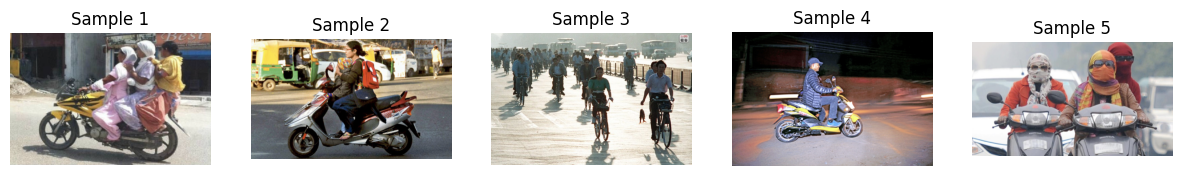

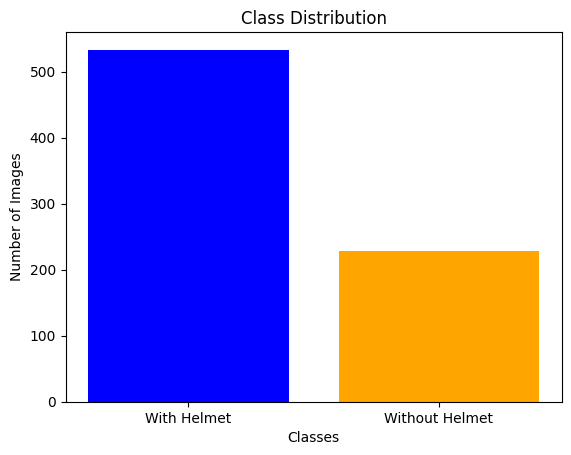

In [13]:
def display_sample_images(folder_path, num_samples=5):
    images = os.listdir(folder_path)[:num_samples]
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(images):
        image_path = os.path.join(folder_path, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Sample {i + 1}")
    plt.show()

# Set paths to the 'With Helmet' and 'Without Helmet' folders
with_helmet_folder = '/content/drive/MyDrive/helmet_detection/with helmet'
without_helmet_folder = '/content/drive/MyDrive/helmet_detection/without helmet'

# Display sample images from 'With Helmet' folder
print("Sample images from 'With Helmet' folder:")
display_sample_images(with_helmet_folder)

# Display sample images from 'Without Helmet' folder
print("Sample images from 'Without Helmet' folder:")
display_sample_images(without_helmet_folder)

# Calculate and plot class distributions
def plot_class_distribution(folder_paths):
    class_counts = []
    for folder_path in folder_paths:
        class_counts.append(len(os.listdir(folder_path)))
    classes = ['With Helmet', 'Without Helmet']

    plt.bar(classes, class_counts, color=['blue', 'orange'])
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.show()

# Plot class distributions
plot_class_distribution([with_helmet_folder, without_helmet_folder])



In [14]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from tensorflow.keras import activations

In [15]:
X_train = []
Y_train = []
image_size = 224
labels = ['with helmet','without helmet']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/helmet_detection/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))

        X_train.append(img)
        Y_train.append(i)

# for i in labels:
#     folderPath = os.path.join('/content/drive/MyDrive/helmet_detection/',i)
#     for j in os.listdir(folderPath):
#         img = cv2.imread(os.path.join(folderPath,j))
#         img = cv2.resize(img,(image_size,image_size))
#         X_train.append(img)
#         Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

KeyboardInterrupt: ignored

In [ ]:
img = cv2.imread(os.path.join(folderPath,j))
img.shape

(231, 400, 3)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(761, 224, 224, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu',  padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.20))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.20))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 112, 112, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 28, 28, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
20/20 [==============================] - 8s 43ms/step - loss: 0.0653 - accuracy: 0.9789 - val_loss: 2.5656 - val_accuracy: 0.6522
Epoch 2/30
20/20 [==============================] - 1s 27ms/step - loss: 0.0278 - accuracy: 0.9886 - val_loss: 4.3531 - val_accuracy: 0.6522
Epoch 3/30
20/20 [==============================] - 1s 28ms/step - loss: 0.0314 - accuracy: 0.9854 - val_loss: 3.5427 - val_accuracy: 0.6667
Epoch 4/30
20/20 [==============================] - 1s 28ms/step - loss: 0.1509 - accuracy: 0.9691 - val_loss: 3.9774 - val_accuracy: 0.6377
Epoch 5/30
20/20 [==============================] - 1s 27ms/step - loss: 0.1174 - accuracy: 0.9626 - val_loss: 2.0272 - val_accuracy: 0.6377
Epoch 6/30
20/20 [==============================] - 1s 28ms/step - loss: 0.0625 - accuracy: 0.9756 - val_loss: 2.8588 - val_accuracy: 0.6087
Epoch 7/30
20/20 [==============================] - 1s 29ms/step - loss: 0.0346 - accuracy: 0.9902 - val_loss: 2.8139 - val_accuracy: 0.7101
Epoch 8/30
20

In [ ]:
history = model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 12ms/step - loss: 2.6924 - accuracy: 0.7792


In [ ]:
# Data Augmentation

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your original image folders
with_helmet_folder = '/content/drive/MyDrive/helmet_detection/with helmet'
without_helmet_folder = '/content/drive/MyDrive/helmet_detection/without helmet'

# Directory to save augmented images
augmented_folder = '/content/drive/MyDrive/helmet_detection/augmented_images'

# Create ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Function to perform augmentation and save augmented images
def augment_images(input_folder, output_folder, prefix, target_count):
    image_files = os.listdir(input_folder)
    num_images = len(image_files)
    if num_images < target_count:
        augment_factor = (target_count // num_images) + 1
        for image_file in image_files:
            img = cv2.imread(os.path.join(input_folder, image_file))
            img = img.reshape((1,) + img.shape)
            i = 0
            for batch in datagen.flow(img, batch_size=1, save_to_dir=output_folder, save_prefix=prefix, save_format='png'):
                i += 1
                if i >= augment_factor:
                    break

augment_images(without_helmet_folder, augmented_folder, 'without_helmet_aug', target_count=533)


In [17]:
X_train = []
Y_train = []
image_size = 224
labels = ['with helmet','without helmet']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/helmet_detection/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        img = img.astype('float32') / 255.0
        X_train.append(img)
        Y_train.append(i)


folderPath = ('/content/drive/MyDrive/helmet_detection/augmented_images')
for j in os.listdir(folderPath):
  img = cv2.imread(os.path.join(folderPath,j))
  img = cv2.resize(img,(image_size,image_size))
  X_train.append(img)
  Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [18]:

X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(2040, 224, 224, 3)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [20]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',  padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
52/52 [==============================] - 204s 4s/step - loss: 2.8784 - accuracy: 0.7397 - val_loss: 0.2495 - val_accuracy: 0.8913
Epoch 2/50
52/52 [==============================] - 197s 4s/step - loss: 0.2467 - accuracy: 0.8662 - val_loss: 0.2335 - val_accuracy: 0.8913
Epoch 3/50
52/52 [==============================] - 195s 4s/step - loss: 0.2351 - accuracy: 0.8826 - val_loss: 0.2283 - val_accuracy: 0.8913
Epoch 4/50
52/52 [==============================] - 206s 4s/step - loss: 0.2346 - accuracy: 0.8826 - val_loss: 0.2314 - val_accuracy: 0.8913
Epoch 5/50
52/52 [==============================] - 197s 4s/step - loss: 0.2346 - accuracy: 0.8826 - val_loss: 0.2284 - val_accuracy: 0.8913
Epoch 6/50
52/52 [==============================] - 191s 4s/step - loss: 0.2338 - accuracy: 0.8826 - val_loss: 0.2346 - val_accuracy: 0.8913
Epoch 7/50
52/52 [==============================] - 203s 4s/step - loss: 0.2326 - accuracy: 0.8826 - val_loss: 0.2249 - val_accuracy: 0.8913
Epoch 8/50
52

In [24]:

history = model.evaluate(X_test,y_test)

7/7 [==============================] - 7s 847ms/step - loss: 0.4078 - accuracy: 0.9167
